 <!DOCTYPE html>
<html>
<head>
  <title>ESI Drop_implementation</title>
</head>
<body>

<h1>Implementation of the artificial noise into the dataset</h1>
<p>In this script, we load the normalised generated data and corresponding labels (already normalized). We apply a various noise levels (cps) and safe data and the labels. </p>


</body>
</html> 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
import keras
%matplotlib inline

Num GPUs Available:  1


In [2]:
import matplotlib.pylab as plt
import numpy as np
import pickle
from tqdm import tqdm
import random

from matplotlib import image
from matplotlib import pyplot
from matplotlib.pyplot import figure

In [3]:
T = np.load("data_Norm.npy")

T = np.reshape(T, [50, 80*109])

Labels = np.load('Label_Norm.npy', allow_pickle=True)

print(T.shape)
print(Labels.shape)

label50=[]
for i in tqdm(range (1)):
    label50=np.append(label50,Labels)
    
label50 = np.reshape(label50, [50, 10])    
print(label50.shape)
    
    
np.save("training_Label_Noise.npy", label50, allow_pickle=True)


(50, 8720)
(50, 10)


100%|██████████| 1/1 [00:00<00:00, 7145.32it/s]

(50, 10)


In [4]:
target=T
#print(target)

from scipy.stats import poisson
from numpy import inf


#generate random values from Poisson distribution with mean=3 and sample size=1
poisson.rvs(mu=3, size=1)

#noisytarget reflectivity values
ntarget = []

numberofimages = 50
noisyr =[]
for a in tqdm(range (numberofimages)):
    cps = random.choice([10,20,50,100,200,400,1000,2000,4000,10000,20000,40000,100000,200000,400000,1000000,2000000,4000000])
    noisyr = poisson.rvs(mu=target[a,:]*cps, size=8720)/cps
    noisyr = (np.log(noisyr) +20)/(20)
    #noisyr[noisyr == -inf] = 0
    ntarget.append(noisyr)
    
    
    
        

  0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipykernel_80297/1903181417.py:19: RuntimeWarning: divide by zero encountered in log
  noisyr = (np.log(noisyr) +20)/(20)
100%|██████████| 50/50 [00:00<00:00, 802.53it/s]


In [5]:
ntarget_a = np.asarray(ntarget)
print(ntarget_a.shape)

ntarget_a = np.reshape(ntarget_a, [50,80,109])

np.save("training_data_Noise.npy", ntarget_a, allow_pickle=True)

(50, 8720)


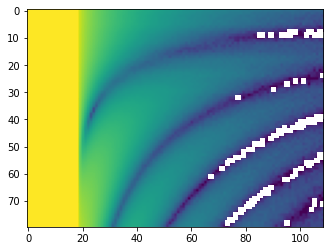

In [6]:
plt.imshow(ntarget_a[10,:,:])